In [2]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load RFM data
rfm = pd.read_csv('/Users/poornavenkat/Documents/GitHub/SQL-Projects/02-Ecommerce-Customer-Analytics/data/Output/rfm_analysis.csv')

# Select features for clustering
features = ['Recency', 'Frequency', 'Monetary']
X = rfm[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data prepared for clustering")
print(f"Shape: {X_scaled.shape}")

Data prepared for clustering
Shape: (96477, 3)


In [4]:
# Cell 2: Find optimal number of clusters
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={score:.3f}")

k=2: Inertia=125045.21, Silhouette=0.448
k=3: Inertia=74830.87, Silhouette=0.485
k=4: Inertia=59382.63, Silhouette=0.410
k=5: Inertia=44534.26, Silhouette=0.427
k=6: Inertia=38176.75, Silhouette=0.438
k=7: Inertia=33449.88, Silhouette=0.378
k=8: Inertia=30838.57, Silhouette=0.348
k=9: Inertia=26672.63, Silhouette=0.352
k=10: Inertia=23360.85, Silhouette=0.366


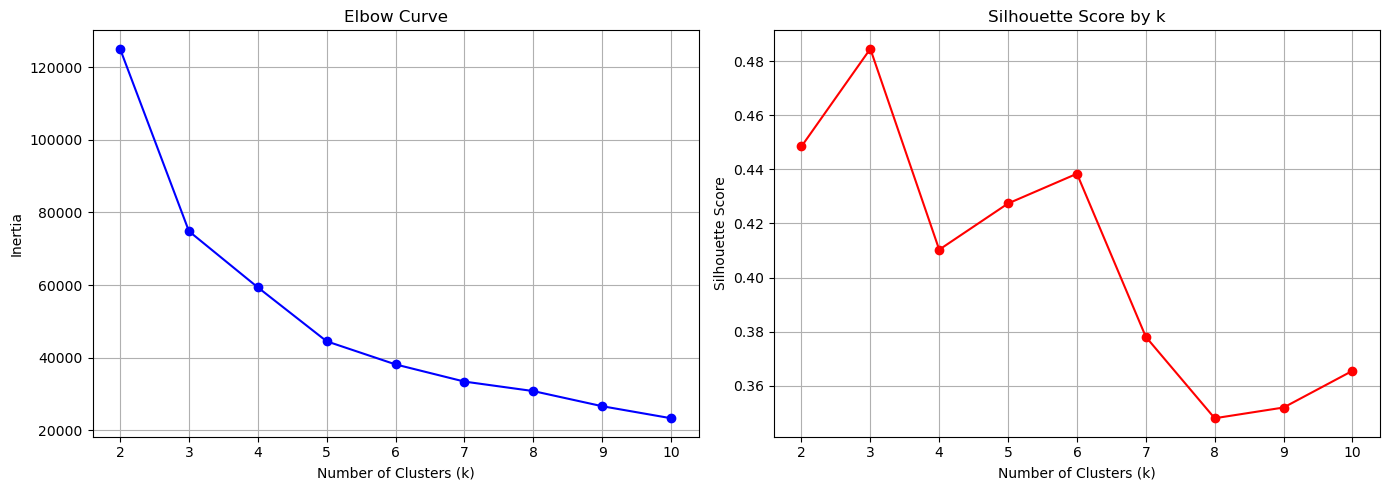

In [5]:
# Cell 3: Visualize elbow curve
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow curve
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Curve')
axes[0].grid(True)

# Silhouette scores
axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score by k')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [6]:
# Cell 4: Apply K-Means with optimal k
optimal_k = 4  # Based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
cluster_summary = rfm.groupby('Cluster')[features].agg(['mean', 'median', 'count'])
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
            Recency               Frequency                   Monetary  \
               mean median  count      mean median  count         mean   
Cluster                                                                  
0         88.317220   89.0  35934       1.0    1.0  35934   136.683712   
1        458.730383  451.0  22328       1.0    1.0  22328   131.817444   
2        240.835104  229.0   2729       1.0    1.0   2729  1101.530715   
3        256.223666  259.0  35486       1.0    1.0  35486   128.545682   

                        
         median  count  
Cluster                 
0        105.96  35934  
1        100.33  22328  
2        893.00   2729  
3        100.34  35486  


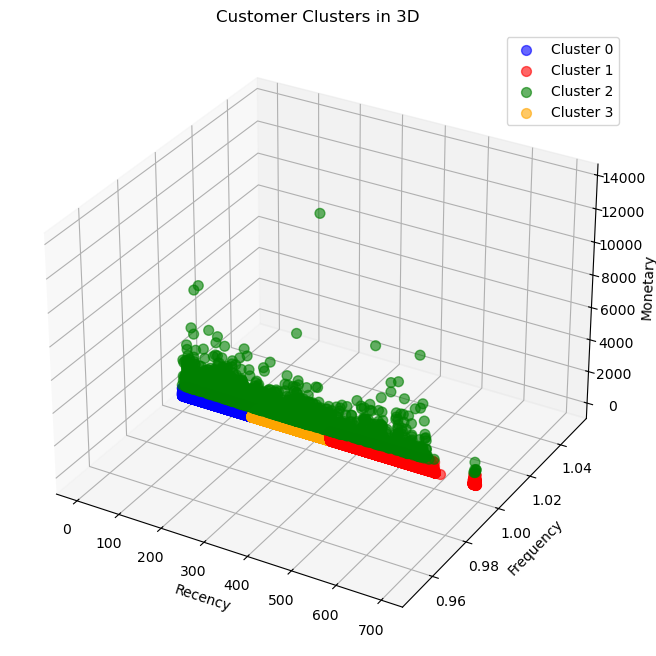

In [8]:
# Cell 5: Visualize clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'green', 'orange', 'purple']
for i in range(optimal_k):
    cluster_data = rfm[rfm['Cluster'] == i]
    ax.scatter(cluster_data['Recency'], 
              cluster_data['Frequency'], 
              cluster_data['Monetary'],
              c=colors[i], 
              label=f'Cluster {i}',
              s=50,
              alpha=0.6)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Customer Clusters in 3D')
ax.legend()

plt.savefig('/Users/poornavenkat/Documents/GitHub/SQL-Projects/02-Ecommerce-Customer-Analytics/data/Output/customer_clusters_3d.png', dpi=300, bbox_inches='tight')
plt.show()